# Topics

## 0. More on numpy arrays

## I. $\chi^2$, Probability, and Confidence Levels

## Lab: HW02


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 0. More on numpy arrays

In [7]:
'''
Three more numpy array methods and an attribute:

.flatten (or .ravel) 

and 

.reshape

and

.transpose (or .T; my guess: @property)


'''
# shape = (5, 2)
a = np.ones( (5, 2))
shape = a.shape
print('a:\n', a)

a_flat = a.flatten()
a_flatt = a.ravel()

print('a_flat:', a_flat)
print('a_flatt:', a_flatt)

a_reshaped = a_flat.reshape(shape)
print('a_reshaped:\n', a_reshaped)

print('a transposed:\n', a.T)
print('a transposed:\n', a.transpose())

a:
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
a_flat: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
a_flatt: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
a_reshaped:
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
a transposed:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
a transposed:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


## I. $\chi^2$, Probability, and Confidence Levels

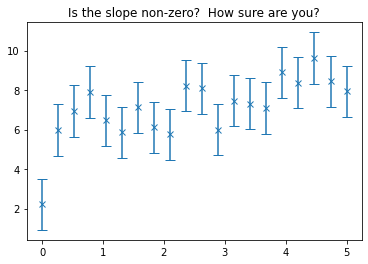

In [8]:
def gen_lin_data(m_true, b_true, x_min, x_max, sig, N=20, seed=None):
    '''
    Note: the default for np.random.seed() is seed=None. 
    '''
    import numpy as np
    np.random.seed(seed=seed)
    x = np.linspace(x_min, x_max, N) 
    y = m_true * x + b_true + np.random.randn(x.shape[0]) * sig
    #returns equation for line, slope, intercept
    return x, y

m_true, b_true = 0.7, 5.
sig = 1.3
x, y = gen_lin_data(m_true, b_true, 0., 5., sig, seed=1298)
plt.errorbar(x, y, yerr=sig, fmt='x', capsize=5)
plt.title('Is the slope non-zero?  How sure are you?')
plt.show()

In [9]:
def compute_cdf(P):
    """
    Input: probability distribution (PDF)
    Returns: CDF

    Adopted from: 

    https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/
    """
    
    # save the original shape
    shape_orig = P.shape
    # this flattens the array.
    P = P.ravel()   
    
    # obtain the indices to sort and unsort the flattened array
    # i_sort will sort L in descending order
    i_sort = np.argsort(P)[::-1]
    i_unsort = np.argsort(i_sort)
    
    P_cumsum = P[i_sort].cumsum()
    # normalization
    P_cumsum /= P_cumsum[-1]
    
    return P_cumsum[i_unsort].reshape(shape_orig)



## Example: Fitting a straight line to data.

The minimum reduced chi2: 0.8408.
The best-fit slope and intercept for the simulated data are m = 0.6955 and b = 5.3554.
(The input values are m_true = 0.7000 and b_true = 5.0000).


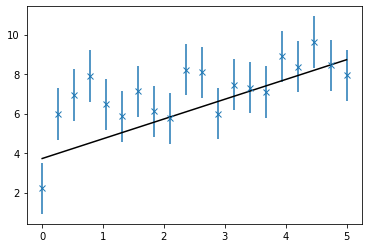

In [10]:
'''
QUESTION: IS THE TEMPERATURE RISING?

Use Grid search.  

There are more efficient ways of doing this. But this way makes every step clear.

'''
def f(x, m, b):
    return m * x + b

# Decide on grid search range
m_wid = 1.5
b_wid = 5.

m_start, m_end = m_true - m_wid, m_true + m_wid
b_start, b_end = b_true - b_wid, b_true + b_wid

m_steps = 1000
b_steps = 1000

m_arr = np.linspace(m_start, m_end, m_steps)
b_arr = np.linspace(b_start, b_end, b_steps)

# initialize chi2_2d
chi2_2d = np.zeros((m_steps, b_steps))

chi2_min = 1e6
for i, m in enumerate(m_arr):
    for j, b in enumerate(b_arr):
        chi2 = ((y - f(x, m, b))**2 / sig**2).sum()
        if chi2 < chi2_min:
            chi2_min = chi2
            m_best = m
            b_best = b
        chi2_2d[i, j] = chi2
            
DOF = len(x) - 2
print('The minimum reduced chi2: {:.4f}.'.format(chi2_min/DOF))
print('The best-fit slope and intercept for the simulated data are \
m = {:.4f} and b = {:.4f}.'.format(m_best, b_best))
print('(The input values are m_true = {:.4f} and b_true = {:.4f}).'.format(m_true, b_true))

plt.errorbar(x, y, yerr=sig, fmt='x')
plt.plot(x, f(m_best, b_best, x), 'k-')
plt.show()

## 1-D CDF (we did that in Week2-1).  How to do 2-D CDF?

## Visualize CDF

- ## An elllipitcally shaped valley
- ## Horizontal cross section: Elliptical
- ## Verital cross sections: Gaussian

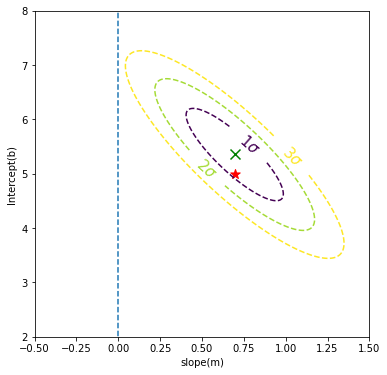

In [12]:
'''Calculate PDF, CDF and plot confidence levels'''

# Calculate probabilty
P = np.exp(-(chi2_2d - chi2_min) / 2)
# Normalize probability
P = P / P.sum()

CDF = compute_cdf(P)

sig1, sig2, sig3 = 0.683, 0.955, 0.997
contour_levels = [sig1, sig2, sig3]
extent = [m_arr[0], m_arr[-1], b_arr[0], b_arr[-1] ]

fig = plt.figure(figsize=(6, 6))
cs = plt.contour(CDF.T, levels=contour_levels, \
                 linestyles=['--','--','--'], extent=extent)

# If you want to be fancy: latex for your plots!
fmtdict = {sig1:r'$1\sigma$', sig2:r'$2\sigma$', sig3:r'$3\sigma$'}
plt.clabel(cs, fmt=fmtdict, inline=True, fontsize=15)

plt.scatter(m_true, b_true, marker = '*', facecolor = 'r', s=100)
plt.scatter(m_best, b_best, marker = 'x', facecolor = 'g', s=100)

#0 slope line:
plt.plot([0, 0], [b_arr[0], b_arr[-1]], '--')

plt.xlim(-0.5, 1.5)
plt.ylim(2, 8)
plt.xlabel('slope(m)')
plt.ylabel('Intercept(b)')
plt.show()

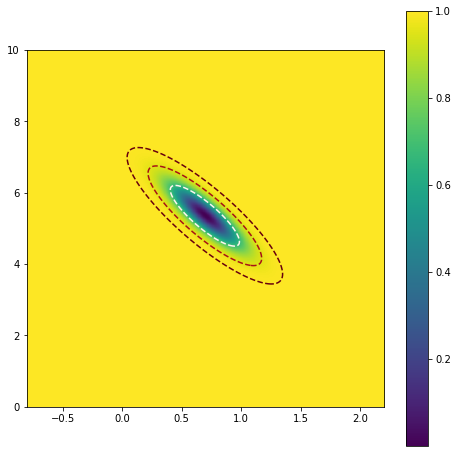

In [21]:
'''
Another way to visualize CDF

To change the height, add a label, etc. to the colorbar:

https://matplotlib.org/3.1.0/tutorials/colors/colorbar_only.html

'''

# pyplot.imshow and 3D plot

fig, ax = plt.subplots(figsize=(8, 8))

# Just as for the contour, we need to specify the keyword argument, extent.
im_ax = ax.imshow(CDF.T, extent=extent, origin='lower' )  # this doesn't look right

# Overlay with contours
CS = ax.contour(CDF.T, linestyles=['--','--','--'], levels=contour_levels, extent=extent, cmap='Reds')

# specify aspect ratio
ax.set_aspect(0.3) # you may also use ax.imshow(..., aspect="auto") to restore the aspect ratio

# Set colorbar -- important!!
fig.colorbar(im_ax)

plt.show()

## End of Week10-1